## En un lugar de la mancha

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from lxml import html
from urllib.request import urlopen
import re
from pprint import pprint
import pandas as pd
from nltk.corpus import stopwords
import numpy as np
import nltk
from textblob import TextBlob

In [2]:
url = 'https://es.wikisource.org/wiki/Don_Quijote,_Primera_Parte:_Cap%C3%ADtulo_I'

In [3]:
html = requests.get(url).content
soup = BeautifulSoup(html)
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Don Quijote, Primera Parte: Capítulo I - Wikisource</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgMonthNamesShort":["","ene","feb","mar","abr","may","jun","jul","ago","sep","oct","nov","dic"],"wgRequestId":"XffqxwpAADgAAAZfcSEAAAFC","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Don_Quijote,_Primera_Parte:_Capítulo_I","wgTitle":"Don Quijote, Primera Parte: Capítulo I","wgCurRevisionId":988143,"wgRevisionId":988143,"wgArticleId":2039,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["El ing

In [4]:
text = [element.text.strip() for element in soup.find_all("div",{"class":"Parrafo"})]
text = [re.sub("\n\n"," ",e) for e in text]
text[0]

'En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocín flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lantejas los viernes, algún palomino de añadidura los domingos, consumían las tres cuartas partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas, con sus pantuflos de lo mesmo, y los días de entresemana se honraba con su vellorí de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años; era de complexión recia, seco de carnes, enjuto de rostro, gran madrugador y amigo de la caza. Quieren decir que tenía el sobrenombre de Quijada, o Quesada, que en esto hay alguna diferencia en los 

In [5]:
scrapping = [word for word in text]
scrapping[:10]

['En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocín flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lantejas los viernes, algún palomino de añadidura los domingos, consumían las tres cuartas partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas, con sus pantuflos de lo mesmo, y los días de entresemana se honraba con su vellorí de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años; era de complexión recia, seco de carnes, enjuto de rostro, gran madrugador y amigo de la caza. Quieren decir que tenía el sobrenombre de Quijada, o Quesada, que en esto hay alguna diferencia en los

In [6]:
scrap = pd.DataFrame(data=scrapping, columns=['DON QUIJOTE'])
scrap.head()

,DON QUIJOTE
0,"En un lugar de la Mancha, de cuyo nombre no qu..."


In [7]:
scrap['DQ'] = scrap['DON QUIJOTE'].apply(lambda scrapping: nltk.word_tokenize(scrapping))
scrap.head()

,DON QUIJOTE,DQ
0,"En un lugar de la Mancha, de cuyo nombre no qu...","[En, un, lugar, de, la, Mancha, ,, de, cuyo, n..."


In [8]:
scrap['word_count'] = scrap['DQ'].apply(len)
scrap.head()

,DON QUIJOTE,DQ,word_count
0,"En un lugar de la Mancha, de cuyo nombre no qu...","[En, un, lugar, de, la, Mancha, ,, de, cuyo, n...",2155


In [9]:
stop = stopwords.words('spanish')
scrap['stopwords'] = scrap['DON QUIJOTE'].apply(lambda comment: len([word for word in comment if word in stop]))
scrap.head()

,DON QUIJOTE,DQ,word_count,stopwords
0,"En un lugar de la Mancha, de cuyo nombre no qu...","[En, un, lugar, de, la, Mancha, ,, de, cuyo, n...",2155,2942


In [10]:
scrap['DQ'] = scrap['DQ'].apply(lambda comment: [word for word in comment if word not in stop])
scrap.head()

,DON QUIJOTE,DQ,word_count,stopwords
0,"En un lugar de la Mancha, de cuyo nombre no qu...","[En, lugar, Mancha, ,, cuyo, nombre, quiero, a...",2155,2942


In [11]:
freq = pd.Series(' '.join(" ".join(comment) for comment in scrap['DQ']).split(" ")).value_counts()[:10]
freq

,            212
.             34
;             21
nombre        13
caballero     11
así            8
tan            7
bien           7
:              6
vino           6
dtype: int64

In [12]:
freq_list = list(freq.index)
scrap['DQ'] = scrap['DQ'].apply(lambda comment: [word for word in comment if word not in freq_list])
scrap.head()

,DON QUIJOTE,DQ,word_count,stopwords
0,"En un lugar de la Mancha, de cuyo nombre no qu...","[En, lugar, Mancha, cuyo, quiero, acordarme, t...",2155,2942


In [13]:
freq = pd.Series(' '.join(" ".join(comment) for comment in scrap['DQ']).split(" ")).value_counts()[:10]
freq

razón     6
sido      5
rocín     5
celada    5
dio       5
Amadís    5
Y         5
don       5
señora    4
hecho     4
dtype: int64

In [14]:
less_freq = pd.Series(' '.join(" ".join(comment) for comment in scrap['DQ']).split(" ")).value_counts()[-10:]
less_freq

puestas        1
dalle          1
riesgo         1
aventura       1
siglos         1
Frisaba        1
desvelábase    1
ocasiones      1
enflaquece     1
divinidad      1
dtype: int64

In [15]:
less_freq_list = list(less_freq.index)
scrap['DQ'] = scrap['DQ'].apply(lambda comment: [word for word in comment if word not in less_freq_list])
scrap.head()

,DON QUIJOTE,DQ,word_count,stopwords
0,"En un lugar de la Mancha, de cuyo nombre no qu...","[En, lugar, Mancha, cuyo, quiero, acordarme, t...",2155,2942


In [16]:
scrap.to_csv('DonQuijote.csv')

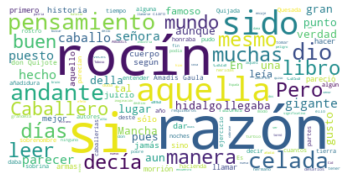

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=70, background_color="White").generate(" ".join(" ".join(comment) for comment in scrap['DQ']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")


plt.savefig('nube.png')
plt.show()